### Missing Data Analysis
#### Basic Sanity Check

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("Mappings.xlsx")
data.columns = data.columns.str.lower().str.replace(" ", "_")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18842 entries, 0 to 18841
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   userid      18842 non-null  int64         
 1   systolic    18842 non-null  float64       
 2   diastolic   18842 non-null  float64       
 3   heart_rate  18842 non-null  float64       
 4   timestamp   18842 non-null  datetime64[ns]
 5   dob         18842 non-null  datetime64[ns]
 6   weight      18842 non-null  float64       
 7   height      18842 non-null  int64         
 8   gender      18842 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 1.3+ MB
None


#### Overall Missingness (Column Level)

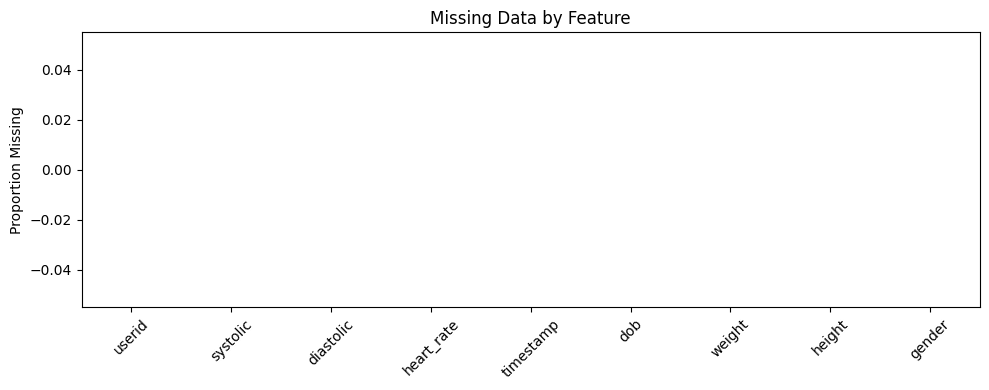

In [7]:
missing_pct = data.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
missing_pct.plot(kind="bar")
plt.ylabel("Proportion Missing")
plt.title("Missing Data by Feature")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Missingness Matrtix (Pattern View)

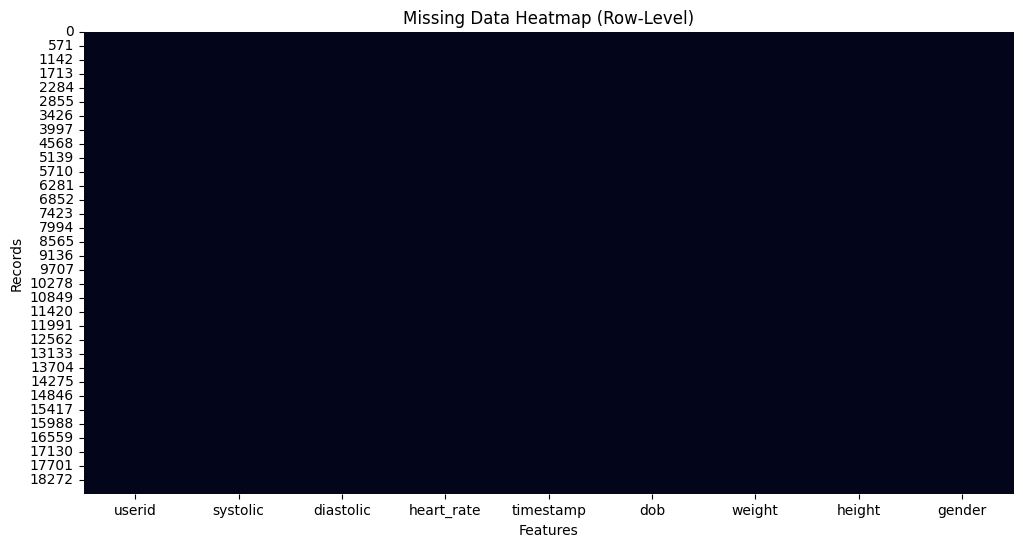

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Data Heatmap (Row-Level)")
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()

#### Static Feature Integrity Check (User-Level)

In [16]:
static_cols = ["dob", "height", "gender"]

static_variation = (
    data.groupby("userid")[static_cols]
        .nunique(dropna=False)
)

print("Users with inconsistent static fields:")
print(static_variation[static_variation.gt(1).any(axis=1)])

Users with inconsistent static fields:
Empty DataFrame
Columns: [dob, height, gender]
Index: []


#### Missingness Per User

In [17]:
user_missing = (
    data.groupby("userid")
        .apply(lambda x: x.isnull().mean())
)

print("Missingness per user:")
print(user_missing.head())

Missingness per user:
        userid  systolic  diastolic  heart_rate  timestamp  dob  weight  \
userid                                                                    
9630       0.0       0.0        0.0         0.0        0.0  0.0     0.0   
9690       0.0       0.0        0.0         0.0        0.0  0.0     0.0   
9888       0.0       0.0        0.0         0.0        0.0  0.0     0.0   
10049      0.0       0.0        0.0         0.0        0.0  0.0     0.0   
10412      0.0       0.0        0.0         0.0        0.0  0.0     0.0   

        height  gender  
userid                  
9630       0.0     0.0  
9690       0.0     0.0  
9888       0.0     0.0  
10049      0.0     0.0  
10412      0.0     0.0  


/var/folders/qm/zmvqdl8n37bdd1h6gz8ys4mc0000gn/T/ipykernel_6104/865499133.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean())


#### Dynamic features missingness

In [20]:
dynamic_cols = ["systolic", "diastolic", "heart_rate", "weight"]

dynamic_missing = data[dynamic_cols].isnull().mean()
print("Dynamic feature missingness:")
print(dynamic_missing)

Dynamic feature missingness:
systolic      0.0
diastolic     0.0
heart_rate    0.0
weight        0.0
dtype: float64


#### Pairwise Missingness (Pattern Detection)

/Users/douglasluong/Downloads/retrieve-data/.venv/lib/python3.14/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/douglasluong/Downloads/retrieve-data/.venv/lib/python3.14/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


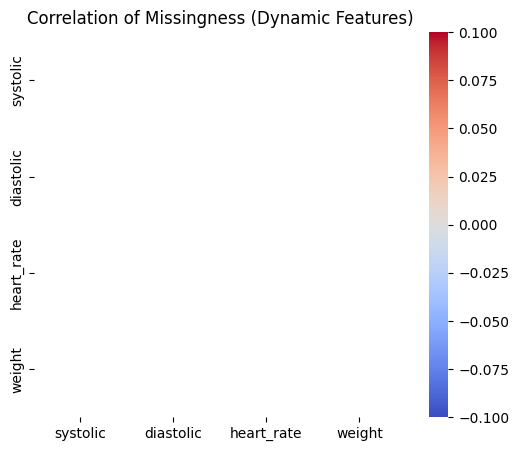

In [21]:
pairwise_missing = data[dynamic_cols].isnull().corr()

plt.figure(figsize=(6, 5))
sns.heatmap(pairwise_missing, annot=True, cmap="coolwarm")
plt.title("Correlation of Missingness (Dynamic Features)")
plt.show()

#### Missingness Over Time

<Figure size 1000x400 with 0 Axes>

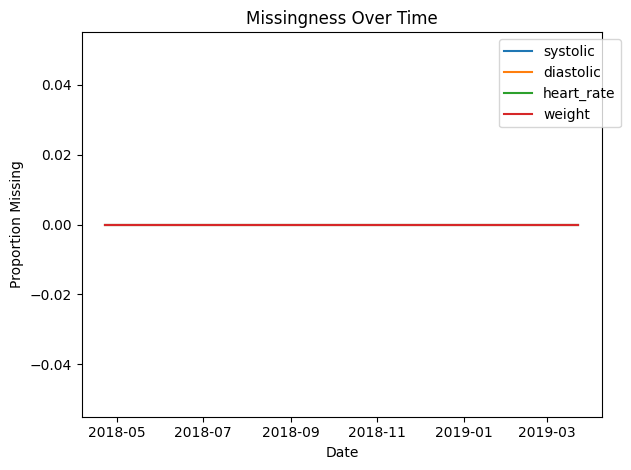

In [22]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["date"] = data["timestamp"].dt.date

time_missing = (
    data.groupby("date")[dynamic_cols]
        .apply(lambda x: x.isnull().mean())
)

plt.figure(figsize=(10,4))
time_missing.plot()
plt.title("Missingness Over Time")
plt.ylabel("Proportion Missing")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#### Summary Table

In [23]:
missing_summary = pd.DataFrame({
    "missing_pct": data.isnull().mean(),
    "missing_count": data.isnull().sum(),
    "dtype": data.dtypes
}).sort_values("missing_pct", ascending=False)

missing_summary

,missing_pct,missing_count,dtype
userid,0.0,0,int64
systolic,0.0,0,float64
diastolic,0.0,0,float64
heart_rate,0.0,0,float64
timestamp,0.0,0,datetime64[ns]
dob,0.0,0,datetime64[ns]
weight,0.0,0,float64
height,0.0,0,int64
gender,0.0,0,object
date,0.0,0,object
